# Task 1

## Logistic regression

In [1]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label.tsv",
    META_PATH="./tumor_normal_label.csv",
    MODEL="logreg_l2",
    K_FEATURE_LIST=(500,),  # hoặc 1000
)

res = run_brca_experiment(cfg)



In [2]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

print_summary(res)

===== OVERVIEW =====
Số mẫu: 1,231 | Số gene/features: 60,660
Phân bố nhãn: {0: 113, 1: 1118} (Tumor=1, Normal=0)
Tỉ lệ số 0 toàn ma trận: 0.461
Số Case ID duy nhất (nhóm): 1,095
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=986, test=245 | train groups=875, test groups=220

===== INNER CV (GridSearch) =====
best average_precision=1.0000
best_params={'clf__C': 1, 'pre__kbest__k': 500}
Fold scores: 0.9999, 1.0000, 1.0000, 0.9999, 1.0000

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 1.0000
PR-AUC : 1.0000
F1     : 1.0000
ACC    : 1.0000

--- Confusion Matrix (counts) ---
        Pred 0  Pred 1
True 0      21       0
True 1       0     224

--- Confusion Matrix (row-normalized) ---
        Pred 0  Pred 1
True 0     1.0     0.0
True 1     0.0     1.0

--- Classification report ---
              precision    recall  f1-score   support

  Normal (0)     1.0000    1.0000    1.0000        21
   Tumor (1)     1.0000    1.0000    1.0000       224

    accuracy                         1.0000

Vẽ Top-N gene (map gene_id → gene_name)

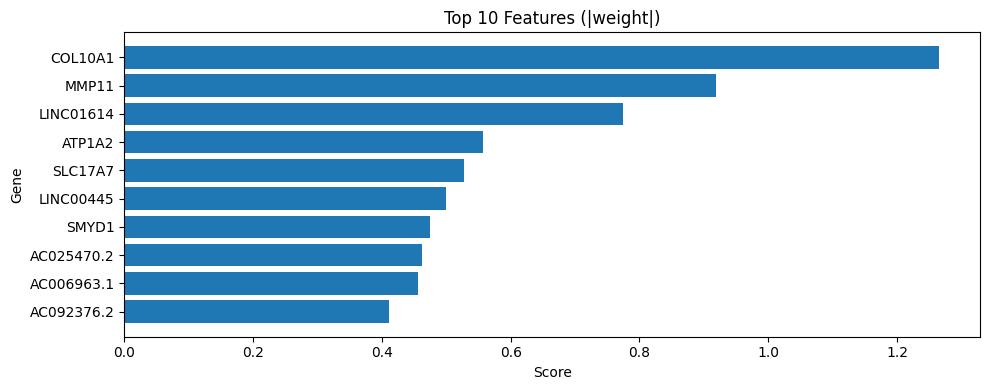

In [3]:
from brca_group_cv_pipeline_bundle_v2 import create_gene_mapper, plot_top_features

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


Lưu model + lưu feature importance

In [4]:
paths = save_inference_bundle(res, out_dir="./model_fixed_selectkbest", prefix="lr")
paths

{'model': './model_fixed_selectkbest/lr_model.joblib',
 'input_feature_cols': './model_fixed_selectkbest/lr_input_feature_cols.json',
 'selected_feature_cols': './model_fixed_selectkbest/lr_selected_feature_cols.json',
 'metadata': './model_fixed_selectkbest/lr_metadata.json'}

## Random forest

In [5]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label.tsv",
    META_PATH="./tumor_normal_label.csv",
    MODEL="rf",
    K_FEATURE_LIST=(500,),  # hoặc 1000
)

res = run_brca_experiment(cfg)



In [6]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

print_summary(res)

===== OVERVIEW =====
Số mẫu: 1,231 | Số gene/features: 60,660
Phân bố nhãn: {0: 113, 1: 1118} (Tumor=1, Normal=0)
Tỉ lệ số 0 toàn ma trận: 0.461
Số Case ID duy nhất (nhóm): 1,095
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=986, test=245 | train groups=875, test groups=220

===== INNER CV (GridSearch) =====
best average_precision=0.9999
best_params={'clf__max_depth': None, 'clf__n_estimators': 300, 'pre__kbest__k': 500}
Fold scores: 0.9999, 1.0000, 0.9999, 0.9999, 1.0000

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 1.0000
PR-AUC : 1.0000
F1     : 0.9956
ACC    : 0.9918

--- Confusion Matrix (counts) ---
        Pred 0  Pred 1
True 0      19       2
True 1       0     224

--- Confusion Matrix (row-normalized) ---
        Pred 0  Pred 1
True 0  0.9048  0.0952
True 1  0.0000  1.0000

--- Classification report ---
              precision    recall  f1-score   support

  Normal (0)     1.0000    0.9048    0.9500        21
   Tumor (1)     0.9912    1.0000    0.9956       224

    ac

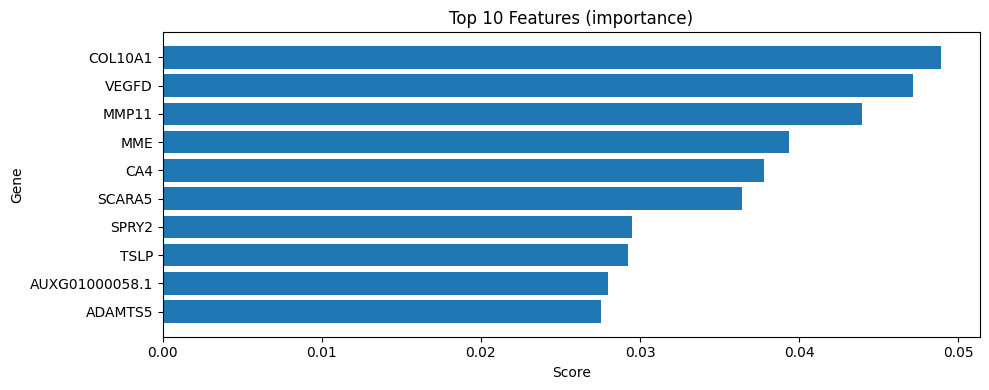

In [7]:
from brca_group_cv_pipeline_bundle_v2 import create_gene_mapper, plot_top_features

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [8]:
paths = save_inference_bundle(res, out_dir="./model_fixed_selectkbest", prefix="rf")
paths

{'model': './model_fixed_selectkbest/rf_model.joblib',
 'input_feature_cols': './model_fixed_selectkbest/rf_input_feature_cols.json',
 'selected_feature_cols': './model_fixed_selectkbest/rf_selected_feature_cols.json',
 'metadata': './model_fixed_selectkbest/rf_metadata.json'}

## SVM

In [9]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label.tsv",
    META_PATH="./tumor_normal_label.csv",
    MODEL="linear_svm",
    K_FEATURE_LIST=(500,),  # hoặc 1000
)

res = run_brca_experiment(cfg)



In [10]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

print_summary(res)

===== OVERVIEW =====
Số mẫu: 1,231 | Số gene/features: 60,660
Phân bố nhãn: {0: 113, 1: 1118} (Tumor=1, Normal=0)
Tỉ lệ số 0 toàn ma trận: 0.461
Số Case ID duy nhất (nhóm): 1,095
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=986, test=245 | train groups=875, test groups=220

===== INNER CV (GridSearch) =====
best average_precision=0.9999
best_params={'clf__C': 0.1, 'pre__kbest__k': 500}
Fold scores: 0.9999, 1.0000, 1.0000, 0.9996, 1.0000

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 1.0000
PR-AUC : 1.0000
F1     : 1.0000
ACC    : 1.0000

--- Confusion Matrix (counts) ---
        Pred 0  Pred 1
True 0      21       0
True 1       0     224

--- Confusion Matrix (row-normalized) ---
        Pred 0  Pred 1
True 0     1.0     0.0
True 1     0.0     1.0

--- Classification report ---
              precision    recall  f1-score   support

  Normal (0)     1.0000    1.0000    1.0000        21
   Tumor (1)     1.0000    1.0000    1.0000       224

    accuracy                         1.00

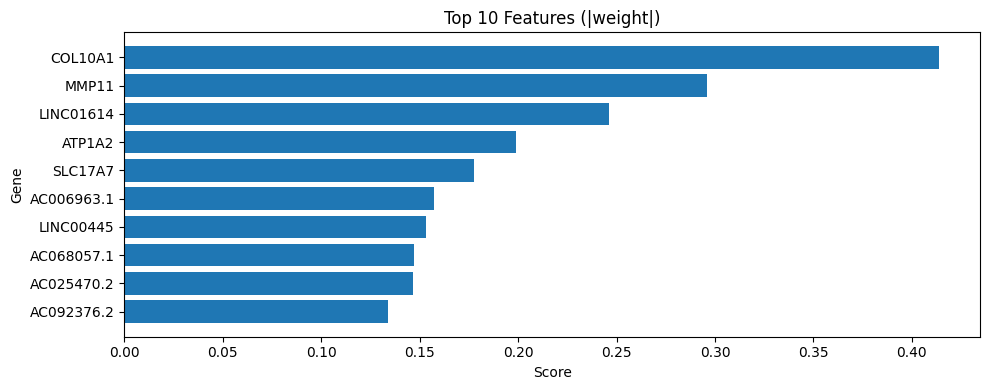

In [11]:
from brca_group_cv_pipeline_bundle_v2 import create_gene_mapper, plot_top_features

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [12]:
paths = save_inference_bundle(res, out_dir="./model_fixed_selectkbest", prefix="svm")
paths

{'model': './model_fixed_selectkbest/svm_model.joblib',
 'input_feature_cols': './model_fixed_selectkbest/svm_input_feature_cols.json',
 'selected_feature_cols': './model_fixed_selectkbest/svm_selected_feature_cols.json',
 'metadata': './model_fixed_selectkbest/svm_metadata.json'}

# XGBoost

In [13]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label.tsv",
    META_PATH="./tumor_normal_label.csv",
    MODEL="xgb",
    K_FEATURE_LIST=(500,),  # hoặc 1000
)

res = run_brca_experiment(cfg)



In [14]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

print_summary(res)

===== OVERVIEW =====
Số mẫu: 1,231 | Số gene/features: 60,660
Phân bố nhãn: {0: 113, 1: 1118} (Tumor=1, Normal=0)
Tỉ lệ số 0 toàn ma trận: 0.461
Số Case ID duy nhất (nhóm): 1,095
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=986, test=245 | train groups=875, test groups=220

===== INNER CV (GridSearch) =====
best average_precision=0.9999
best_params={'clf__max_depth': 3, 'clf__n_estimators': 300, 'pre__kbest__k': 500}
Fold scores: 0.9999, 1.0000, 1.0000, 0.9999, 1.0000

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 1.0000
PR-AUC : 1.0000
F1     : 0.9956
ACC    : 0.9918

--- Confusion Matrix (counts) ---
        Pred 0  Pred 1
True 0      19       2
True 1       0     224

--- Confusion Matrix (row-normalized) ---
        Pred 0  Pred 1
True 0  0.9048  0.0952
True 1  0.0000  1.0000

--- Classification report ---
              precision    recall  f1-score   support

  Normal (0)     1.0000    0.9048    0.9500        21
   Tumor (1)     0.9912    1.0000    0.9956       224

    accur

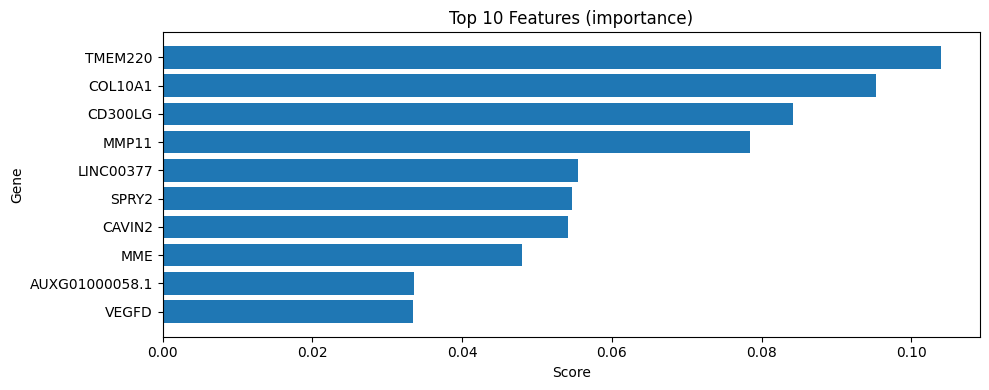

In [15]:
from brca_group_cv_pipeline_bundle_v2 import create_gene_mapper, plot_top_features

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [16]:
paths = save_inference_bundle(res, out_dir="./model_fixed_selectkbest", prefix="xgb")
paths

{'model': './model_fixed_selectkbest/xgb_model.joblib',
 'input_feature_cols': './model_fixed_selectkbest/xgb_input_feature_cols.json',
 'selected_feature_cols': './model_fixed_selectkbest/xgb_selected_feature_cols.json',
 'metadata': './model_fixed_selectkbest/xgb_metadata.json'}

# task 2

## Logistic regression

In [17]:
from brca_idc_ilc_groupcv_bundle import ExperimentConfig, run_brca_experiment, print_summary,save_inference_bundle,create_gene_mapper, plot_top_features

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label_subtyping.tsv",
    META_PATH="./breast_cancer_annotation.csv",
    MODEL="logreg_l2",
    K_FEATURE_LIST=(500,),
)

res = run_brca_experiment(cfg)


In [18]:
print_summary(res)


===== OVERVIEW =====
Số mẫu: 955 | Số gene/features: 60,660
Phân bố nhãn: {0: 767, 1: 188} (0=ILC (1), 1=IDC (0))
Tỉ lệ số 0 toàn ma trận: 0.462
Số Case ID duy nhất (nhóm): 936
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=766, test=189 | train groups=749, test groups=187

===== INNER CV (GridSearch) =====
best average_precision=0.8361
best_params={'clf__C': 1, 'pre__kbest__k': 500}
Fold scores: 0.8646, 0.8870, 0.8258, 0.7739, 0.8293

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 0.9446
PR-AUC : 0.8193
F1     : 0.7436
ACC    : 0.8942

--- Confusion Matrix (counts) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)           140            13
True IDC (0)             7            29

--- Confusion Matrix (row-normalized) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)        0.9150        0.0850
True IDC (0)        0.1944        0.8056

--- Classification report ---
              precision    recall  f1-score   support

     ILC (1)     0.9524    0.9150    0.9333   

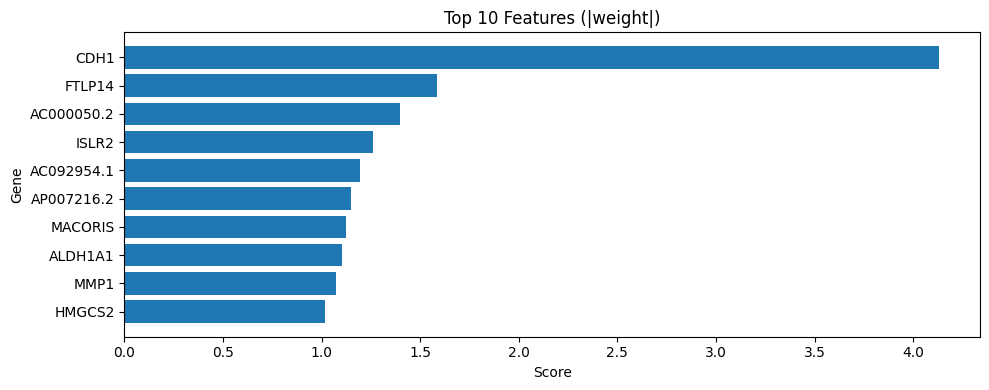

In [19]:

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [20]:

paths = save_inference_bundle(res, out_dir="./model_fixed_selectkbest", prefix="task2_lr")
paths

{'model': './model_fixed_selectkbest/task2_lr_model.joblib',
 'input_feature_cols': './model_fixed_selectkbest/task2_lr_input_feature_cols.json',
 'selected_feature_cols': './model_fixed_selectkbest/task2_lr_selected_feature_cols.json',
 'metadata': './model_fixed_selectkbest/task2_lr_metadata.json'}

## Random forest

In [21]:
from brca_idc_ilc_groupcv_bundle import ExperimentConfig, run_brca_experiment, print_summary,save_inference_bundle,create_gene_mapper, plot_top_features

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label_subtyping.tsv",
    META_PATH="./breast_cancer_annotation.csv",
    MODEL="rf",
    K_FEATURE_LIST=(500,),
)

res = run_brca_experiment(cfg)


In [22]:
print_summary(res)


===== OVERVIEW =====
Số mẫu: 955 | Số gene/features: 60,660
Phân bố nhãn: {0: 767, 1: 188} (0=ILC (1), 1=IDC (0))
Tỉ lệ số 0 toàn ma trận: 0.462
Số Case ID duy nhất (nhóm): 936
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=766, test=189 | train groups=749, test groups=187

===== INNER CV (GridSearch) =====
best average_precision=0.8005
best_params={'clf__max_depth': None, 'clf__n_estimators': 300, 'pre__kbest__k': 500}
Fold scores: 0.8482, 0.8809, 0.7423, 0.7317, 0.7993

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 0.9160
PR-AUC : 0.7977
F1     : 0.6780
ACC    : 0.8995

--- Confusion Matrix (counts) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)           150             3
True IDC (0)            16            20

--- Confusion Matrix (row-normalized) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)        0.9804        0.0196
True IDC (0)        0.4444        0.5556

--- Classification report ---
              precision    recall  f1-score   support

     ILC 

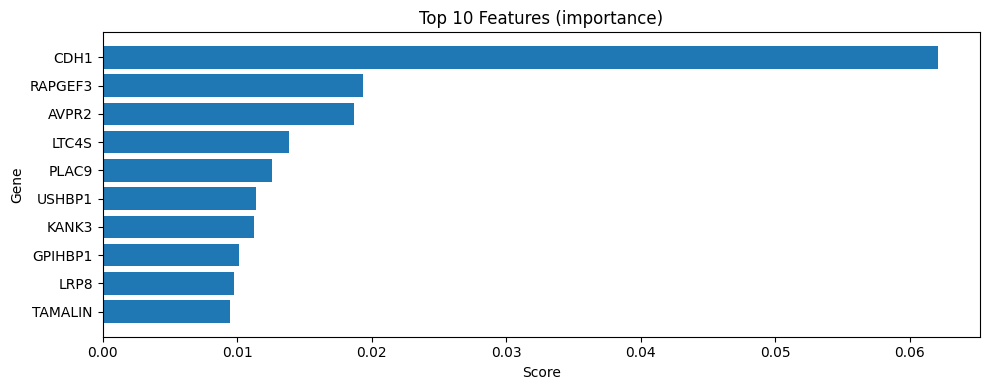

In [23]:

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [24]:
paths = save_inference_bundle(res, out_dir="./model_fixed_selectkbest", prefix="task2_rf")
paths

{'model': './model_fixed_selectkbest/task2_rf_model.joblib',
 'input_feature_cols': './model_fixed_selectkbest/task2_rf_input_feature_cols.json',
 'selected_feature_cols': './model_fixed_selectkbest/task2_rf_selected_feature_cols.json',
 'metadata': './model_fixed_selectkbest/task2_rf_metadata.json'}

## SVM

In [25]:
from brca_idc_ilc_groupcv_bundle import ExperimentConfig, run_brca_experiment, print_summary,save_inference_bundle,create_gene_mapper, plot_top_features

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label_subtyping.tsv",
    META_PATH="./breast_cancer_annotation.csv",
    MODEL="linear_svm",
    K_FEATURE_LIST=(500,),
)

res = run_brca_experiment(cfg)


In [26]:
print_summary(res)


===== OVERVIEW =====
Số mẫu: 955 | Số gene/features: 60,660
Phân bố nhãn: {0: 767, 1: 188} (0=ILC (1), 1=IDC (0))
Tỉ lệ số 0 toàn ma trận: 0.462
Số Case ID duy nhất (nhóm): 936
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=766, test=189 | train groups=749, test groups=187

===== INNER CV (GridSearch) =====
best average_precision=0.8297
best_params={'clf__C': 0.1, 'pre__kbest__k': 500}
Fold scores: 0.8556, 0.8528, 0.8285, 0.7744, 0.8374

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 0.9468
PR-AUC : 0.8224
F1     : 0.7632
ACC    : 0.9048

--- Confusion Matrix (counts) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)           142            11
True IDC (0)             7            29

--- Confusion Matrix (row-normalized) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)        0.9281        0.0719
True IDC (0)        0.1944        0.8056

--- Classification report ---
              precision    recall  f1-score   support

     ILC (1)     0.9530    0.9281    0.9404 

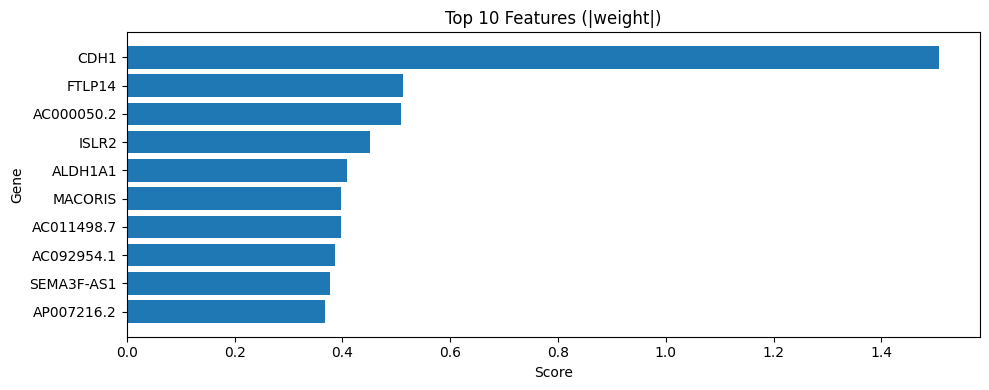

In [27]:

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [28]:

paths = save_inference_bundle(res, out_dir="./model_fixed_selectkbest", prefix="task2_svm")
paths

{'model': './model_fixed_selectkbest/task2_svm_model.joblib',
 'input_feature_cols': './model_fixed_selectkbest/task2_svm_input_feature_cols.json',
 'selected_feature_cols': './model_fixed_selectkbest/task2_svm_selected_feature_cols.json',
 'metadata': './model_fixed_selectkbest/task2_svm_metadata.json'}

## XGB

In [29]:
from brca_idc_ilc_groupcv_bundle import ExperimentConfig, run_brca_experiment, print_summary,save_inference_bundle,create_gene_mapper, plot_top_features

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label_subtyping.tsv",
    META_PATH="./breast_cancer_annotation.csv",
    MODEL="xgb",
    K_FEATURE_LIST=(500,),
)

res = run_brca_experiment(cfg)


In [30]:
print_summary(res)


===== OVERVIEW =====
Số mẫu: 955 | Số gene/features: 60,660
Phân bố nhãn: {0: 767, 1: 188} (0=ILC (1), 1=IDC (0))
Tỉ lệ số 0 toàn ma trận: 0.462
Số Case ID duy nhất (nhóm): 936
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=766, test=189 | train groups=749, test groups=187

===== INNER CV (GridSearch) =====
best average_precision=0.8775
best_params={'clf__max_depth': 4, 'clf__n_estimators': 600, 'pre__kbest__k': 500}
Fold scores: 0.8977, 0.9334, 0.8098, 0.8255, 0.9213

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 0.9408
PR-AUC : 0.8289
F1     : 0.7353
ACC    : 0.9048

--- Confusion Matrix (counts) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)           146             7
True IDC (0)            11            25

--- Confusion Matrix (row-normalized) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)        0.9542        0.0458
True IDC (0)        0.3056        0.6944

--- Classification report ---
              precision    recall  f1-score   support

     ILC (1)

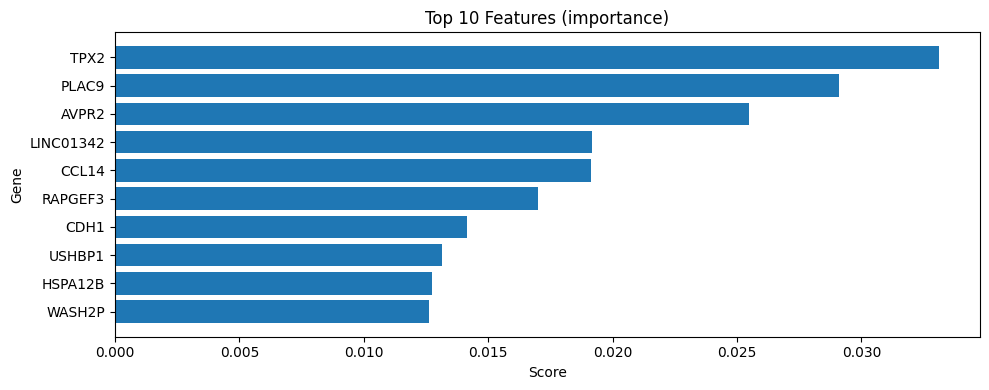

In [31]:

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [32]:

paths = save_inference_bundle(res, out_dir="./model_fixed_selectkbest", prefix="task2_xgb")
paths

{'model': './model_fixed_selectkbest/task2_xgb_model.joblib',
 'input_feature_cols': './model_fixed_selectkbest/task2_xgb_input_feature_cols.json',
 'selected_feature_cols': './model_fixed_selectkbest/task2_xgb_selected_feature_cols.json',
 'metadata': './model_fixed_selectkbest/task2_xgb_metadata.json'}